In [1]:
import numpy as np  
import pandas as pd

In [2]:
train_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",skiprows = 1, header = None)
test_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels
print(train_set)
print("###############")
test_set.head()
data=train_set
uniqueId=""
target="wage_class"
features=["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week","workclass"]
print(features)
print("Number of records in training data :",len(train_set))
print("Number of records in testing data :",len(test_set))

       age      workclass  fnlwgt      education  education_num  \
0       25        Private  226802           11th              7   
1       38        Private   89814        HS-grad              9   
2       28      Local-gov  336951     Assoc-acdm             12   
3       44        Private  160323   Some-college             10   
4       18              ?  103497   Some-college             10   
...    ...            ...     ...            ...            ...   
16276   39        Private  215419      Bachelors             13   
16277   64              ?  321403        HS-grad              9   
16278   38        Private  374983      Bachelors             13   
16279   44        Private   83891      Bachelors             13   
16280   35   Self-emp-inc  182148      Bachelors             13   

            marital_status          occupation     relationship  \
0            Never-married   Machine-op-inspct        Own-child   
1       Married-civ-spouse     Farming-fishing          Husba

In [3]:
for i in range(0,len(data[target])):
    string=data[target][i]
    #print(string)
    if("<=50K." in string):
        #print(data[target][i])
        data[target][i]=0
    else:
        #print(data[target][i])
        data[target][i]=1
    
        
for i in range(0,len(test_set[target])):
    string=test_set[target][i]
    if("<=50K." in string):
        #print(data[target][i])
        test_set[target][i]=0
    else:
        #print(data[target][i])
        test_set[target][i]=1
        
print(data.head(5))
print(test_set.head(5))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages

   age   workclass  fnlwgt      education  education_num       marital_status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital_gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital_loss  hours_per_week  native_country wage_class  
0             0              40   Uni

In [4]:
if(uniqueId==""):
    uniqueId=uniqueId
    uniqueIdGenerator=np.arange(1,len(data))
    UqId=pd.DataFrame(list(uniqueIdGenerator),columns=["UniqueId"])
    #data=pd.concat([UqId,data],axis=1) 
    initData=pd.concat([UqId,data],axis=1) 
    uniqueId=initData.columns[0]
print(initData.head(10))

   UniqueId  age          workclass  fnlwgt      education  education_num  \
0       1.0   25            Private  226802           11th              7   
1       2.0   38            Private   89814        HS-grad              9   
2       3.0   28          Local-gov  336951     Assoc-acdm             12   
3       4.0   44            Private  160323   Some-college             10   
4       5.0   18                  ?  103497   Some-college             10   
5       6.0   34            Private  198693           10th              6   
6       7.0   29                  ?  227026        HS-grad              9   
7       8.0   63   Self-emp-not-inc  104626    Prof-school             15   
8       9.0   24            Private  369667   Some-college             10   
9      10.0   55            Private  104996        7th-8th              4   

        marital_status          occupation    relationship    race      sex  \
0        Never-married   Machine-op-inspct       Own-child   Black     Ma

In [5]:
#Python method for handling nan values
#Numerical columns replaced with mean
#String columns replaced with mode
from collections import Counter
def dataCleaning(inputData,features,uniqueId,target):
    updatedData =  inputData[target]   
    dataForClean=pd.DataFrame()
    for i in range(0,len(features)):
        dataForClean=pd.concat([dataForClean,pd.DataFrame(inputData[features[i]])],axis=1)
    dataForClean=pd.concat([dataForClean,pd.DataFrame(inputData[target])],axis=1)
    inputData=dataForClean
    for i in range(0,len(inputData.columns)):
        colName=inputData.columns[i]
        if( (inputData[colName].dtype.name=="object" and inputData[colName].dtype.name!= target) and colName != uniqueId):
            mode=Counter(inputData[colName])
            modeval= mode.most_common(1)[0][0]
            inputData[colName]= inputData[colName].replace(np.NaN, modeval)
        else:
            inputData[colName]= inputData[colName].replace(np.NaN, np.mean(inputData[colName]))

    
    return inputData,updatedData

data,updatedDataTrain=dataCleaning(data,features,uniqueId,target)
test_set,updatedDataTest=dataCleaning(test_set,features,uniqueId,target)
print(data.head(10))
print(test_set.head(10))

   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   25  226802              7             0             0              40   
1   38   89814              9             0             0              50   
2   28  336951             12             0             0              40   
3   44  160323             10          7688             0              40   
4   18  103497             10             0             0              30   
5   34  198693              6             0             0              30   
6   29  227026              9             0             0              40   
7   63  104626             15          3103             0              32   
8   24  369667             10             0             0              40   
9   55  104996              4             0             0              10   

           workclass  wage_class  
0            Private           0  
1            Private           0  
2          Local-gov           1  
3           

In [6]:
#Python method for pre-processing the data
#Categorical variables are label and one hot encoded
def dataPreProcess(inputData,target):
    from sklearn import preprocessing 
    labelencoder= preprocessing.LabelEncoder()
    onehotencoder = preprocessing.OneHotEncoder(sparse=False)
    notencoded = pd.DataFrame()
    encoded = pd.DataFrame()
    colNames=[]
    for i in range(0,len(inputData.columns)):
        colNames.append(inputData.columns[i])
        
    for i in range(0,len(colNames)):
        colName=colNames[i]
        if( (inputData[colName].dtype.name=="object" and inputData[colName].dtype.name!= target) and colNames[i] != uniqueId):
            df =  labelencoder.fit_transform(inputData[colName])
            df = np.array(inputData[colName])
            df =   df.reshape(len(df),1)
            onehot_encoded = onehotencoder.fit_transform(df)
            onehot_encoded = pd.DataFrame(onehot_encoded)
            onehot_encoded = onehot_encoded.drop(len(onehot_encoded.columns)-1,axis=1)
            encoded=pd.concat([onehot_encoded,encoded],axis=1)       
        else:
            notencoded=  pd.concat([notencoded,inputData[colName]],axis=1)
    combinedData=pd.concat([encoded,notencoded],axis=1)
    updatedData=pd.DataFrame()
    updatedData=pd.concat([updatedData,combinedData],axis=1) 
    Y = pd.DataFrame() 
    Y = pd.DataFrame(updatedData[target])
    del updatedData[target]
    X = pd.DataFrame()
    X = updatedData
   
    return X,Y    

X,Y=dataPreProcess(data,target)
XTest,YTest=dataPreProcess(test_set,target)    
print(X.head(5))
print(Y.head(5))
print(XTest.head(5))
print(YTest.head(5))

     0    1    2    3    4    5    6    7  age  fnlwgt  education_num  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   25  226802              7   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   38   89814              9   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   28  336951             12   
3  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   44  160323             10   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   18  103497             10   

   capital_gain  capital_loss  hours_per_week  
0             0             0              40  
1             0             0              50  
2             0             0              40  
3          7688             0              40  
4             0             0              30  
   wage_class
0           0
1           0
2           1
3           1
4           0
     0    1    2    3    4    5    6    7  age  fnlwgt  education_num  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   25  226802              7   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

In [7]:
def xgBoostClassification(X,Y):
    from sklearn.model_selection import cross_val_score, KFold
    from xgboost import XGBClassifier
    xgbc = XGBClassifier()
    xgbc.fit(X, Y)
    #cross validataion
    scores = cross_val_score(xgbc, X, Y, cv=5)
    print("Mean cross-validation score: %.2f" % scores.mean())
    kfold = KFold(n_splits=10, shuffle=True)
    kf_cv_scores = cross_val_score(xgbc, X, Y, cv=kfold )
    print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
    predictions = xgbc.predict(X)
    from sklearn import metrics       
    cm = metrics.confusion_matrix(YTest, predictions)
    return predictions,cm
    

In [8]:
predictions,cm=xgBoostClassification(X, Y)
truePositive = cm[0,0]
falsePositive= cm[1,0]
trueNegative= cm[1,1]
falseNegative=cm[0,1]
accuracy= (truePositive + trueNegative) / (truePositive+falsePositive+trueNegative+falseNegative)
precision= (truePositive) /(truePositive + falsePositive)
recall=   (truePositive) /(truePositive+falseNegative)
f1score= (2*precision*recall) / (precision+recall)


C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean cross-validation score: 0.84
K-fold CV average score: 0.84


In [9]:
print(".............Evaluation metrics..............")
print("Accuracy: ",accuracy)
print("cm: ",cm)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1Score: ",f1score)

.............Evaluation metrics..............
Accuracy:  0.8872919353848043
cm:  [[12145   290]
 [ 1545  2301]]
Precision:  0.8871439006574142
Recall:  0.9766787293928428
F1Score:  0.9297607655502392


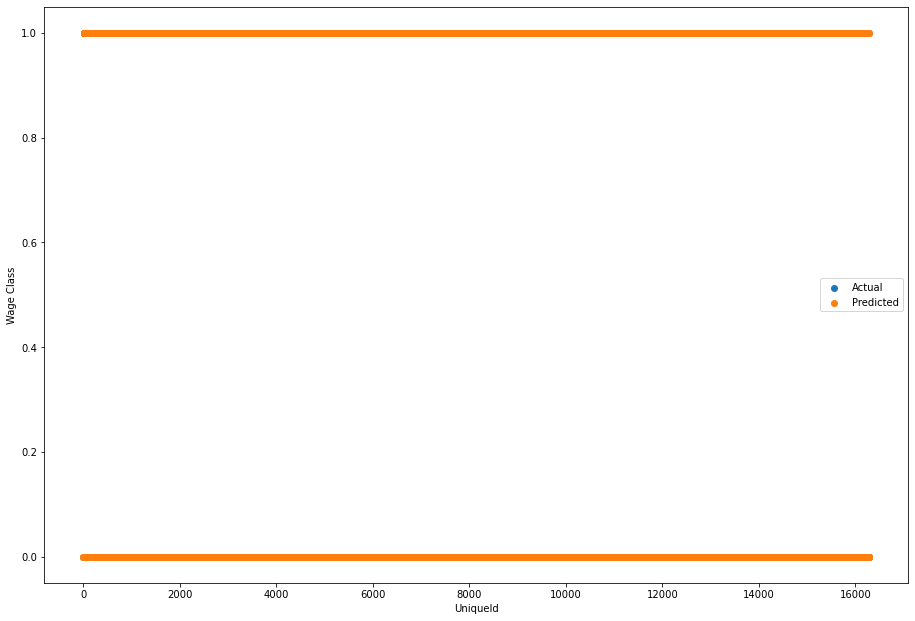

In [11]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_axes([0,0,2,2])
y_axis_pred =  YTest
y_axis_actual = Y
x_axis= list(np.arange(0,len(X[0])))
ax.scatter(x_axis,y_axis_pred)
ax.scatter(x_axis,y_axis_actual)
ax.set_xlabel("UniqueId")
ax.set_ylabel("Wage Class")
ax.legend(labels=['Actual', 'Predicted'])
plt.show()